# Tarea-3

## Alumno: Marcelo Alberto Sanchez Zaragoza

In [1]:
%matplotlib inline
import pandas as pd
import skimage
print(skimage.__version__)
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from IPython.display import display
from scipy.ndimage import affine_transform, zoom
from scipy import misc

0.17.2


C:\ProgramData\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


A manera de ejemplo vemos un primer elemento de las imagenes

100 100 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


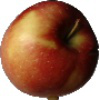

In [2]:
im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
#im.show() # display the image (in window)
display(im)

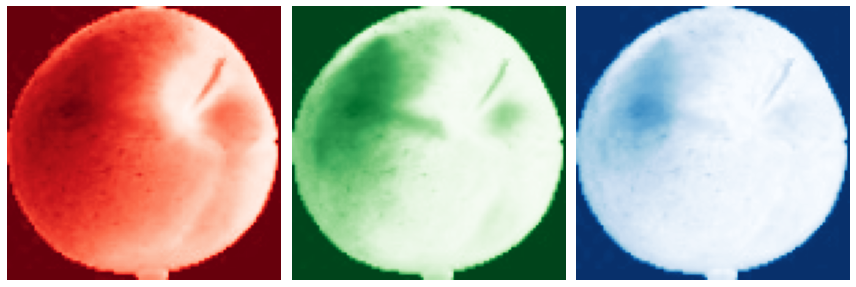

In [3]:
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B
# we shall use matplotlib to display the channels
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

In [4]:
s = stat.Stat(im)
print(s.extrema) # maximum and minimum pixel values for each channel R, G, B
print(s.count)
print(s.mean)
print(s.median)
print(s.stddev)

[(8, 255), (1, 255), (0, 255)]
[10000, 10000, 10000]
[155.9124, 112.2766, 90.4281]
[161, 87, 45]
[78.05949094274187, 94.11214635975529, 96.81876693281112]


Realizamos un listado de los nombres de los archivos para encontrar los respectivos nombres y posteriormente hacer el analisis correspondiente.

In [5]:
import os
from os.path import isfile, join

ruta = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Tarea_3\data_fruits_tarea'

contenido = os.listdir(ruta)

archivos = [nombre for nombre in contenido if isfile(join(ruta, nombre))]
print(archivos)


['Apple_Braeburn_100_100.jpg', 'Apple_Braeburn_101_100.jpg', 'Apple_Braeburn_104_100.jpg', 'Apple_Braeburn_107_100.jpg', 'Apple_Braeburn_108_100.jpg', 'Apple_Braeburn_112_100.jpg', 'Apple_Braeburn_118_100.jpg', 'Apple_Braeburn_119_100.jpg', 'Apple_Braeburn_128_100.jpg', 'Apple_Braeburn_131_100.jpg', 'Apple_Braeburn_137_100.jpg', 'Apple_Braeburn_140_100.jpg', 'Apple_Braeburn_142_100.jpg', 'Apple_Braeburn_143_100.jpg', 'Apple_Braeburn_152_100.jpg', 'Apple_Braeburn_155_100.jpg', 'Apple_Braeburn_156_100.jpg', 'Apple_Braeburn_15_100.jpg', 'Apple_Braeburn_161_100.jpg', 'Apple_Braeburn_164_100.jpg', 'Apple_Braeburn_173_100.jpg', 'Apple_Braeburn_182_100.jpg', 'Apple_Braeburn_18_100.jpg', 'Apple_Braeburn_190_100.jpg', 'Apple_Braeburn_193_100.jpg', 'Apple_Braeburn_195_100.jpg', 'Apple_Braeburn_197_100.jpg', 'Apple_Braeburn_200_100.jpg', 'Apple_Braeburn_202_100.jpg', 'Apple_Braeburn_21_100.jpg', 'Apple_Braeburn_223_100.jpg', 'Apple_Braeburn_227_100.jpg', 'Apple_Braeburn_231_100.jpg', 'Apple_Braeb

En esta sección vamos a realizar una serie de dataframe para poder imprimir las imagenes en pantalla. 

In [6]:
manzanas = []
for r in range(300):
    im = Image.open(join(ruta, archivos[r]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    manzanas.append(s.median)
    #im=0

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

In [8]:
#creamos un primer dataframe
p1 = pd.DataFrame(manzanas)

In [9]:
x = p1.iloc[:,0:1]
y = p1.iloc[:,1:2]
z = p1.iloc[:,2:3]

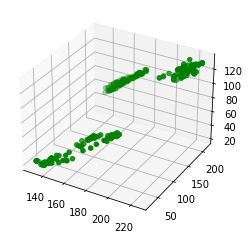

In [10]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, c='g', marker='o')
plt.show()

In [11]:
#partimos de 300 y de esta nueva fruta son 100 elemntos.
albaricoche = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+300]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    albaricoche.append(s.median)
    #im=0

In [12]:
p2 = pd.DataFrame(albaricoche)

In [13]:
x2 = p2.iloc[:,0:1]
y2 = p2.iloc[:,1:2]
z2 = p2.iloc[:,2:3]

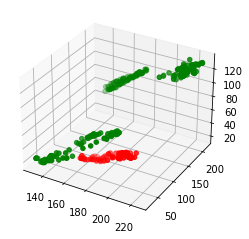

In [14]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')
plt.show()

In [15]:
aguacate = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+400]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    aguacate.append(s.median)
    #im=0

In [16]:
p3 = pd.DataFrame(aguacate)
x3 = p3.iloc[:,0:1]
y3 = p3.iloc[:,1:2]
z3 = p3.iloc[:,2:3]

In [17]:
carambula = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+500]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    carambula.append(s.median)
    #im=0
p4 = pd.DataFrame(carambula)
x4 = p4.iloc[:,0:1]
y4 = p4.iloc[:,1:2]
z4 = p4.iloc[:,2:3]

In [18]:
cereza = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+600]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    cereza.append(s.median)
    #im=0
p5 = pd.DataFrame(cereza)
x5 = p5.iloc[:,0:1]
y5 = p5.iloc[:,1:2]
z5 = p5.iloc[:,2:3]

In [19]:
mora = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+700]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    mora.append(s.median)
    #im=0
p6 = pd.DataFrame(mora)
x6 = p6.iloc[:,0:1]
y6 = p6.iloc[:,1:2]
z6 = p6.iloc[:,2:3]

In [20]:
kiwi = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+800]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    kiwi.append(s.median)
    #im=0
p7 = pd.DataFrame(kiwi)
x7 = p7.iloc[:,0:1]
y7 = p7.iloc[:,1:2]
z7 = p7.iloc[:,2:3]

In [21]:
naranja = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+900]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    naranja.append(s.median)
    #im=0
p8 = pd.DataFrame(naranja)
x8 = p8.iloc[:,0:1]
y8 = p8.iloc[:,1:2]
z8 = p8.iloc[:,2:3]

In [22]:
durazno = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+1000]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    durazno.append(s.median)
    #im=0
p9 = pd.DataFrame(durazno)
x9 = p9.iloc[:,0:1]
y9 = p9.iloc[:,1:2]
z9 = p9.iloc[:,2:3]

In [23]:
piña = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+1100]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    piña.append(s.median)
    #im=0
p10 = pd.DataFrame(piña)
x10 = p10.iloc[:,0:1]
y10 = p10.iloc[:,1:2]
z10 = p10.iloc[:,2:3]

In [24]:
fresa = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+1200]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    fresa.append(s.median)
    #im=0
p11 = pd.DataFrame(fresa)
x11 = p11.iloc[:,0:1]
y11 = p11.iloc[:,1:2]
z11 = p11.iloc[:,2:3]

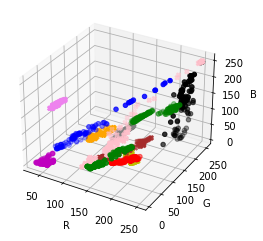

In [35]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')
ax1.scatter(x3, y3, z3, c ='b', marker='o')
ax1.scatter(x4, y4, z4, c ='k', marker='o')
ax1.scatter(x5, y5, z5, c ='m', marker='o')
ax1.scatter(x6, y6, z6, c ='violet', marker='X')
ax1.scatter(x7, y7, z7, c ='gray', marker='X')
ax1.scatter(x8, y8, z8, c ='y', marker='X')
ax1.scatter(x9, y9, z9, c ='brown', marker='X')
ax1.scatter(x10, y10, z10, c ='orange', marker='X')
ax1.scatter(x11, y11, z11, c ='pink', marker='X')

ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
# Mostramos el gráfico
plt.show()
 

Realizamos un poco de movimiento de los datos para encontrar algunos patrones

<IPython.core.display.Javascript object>


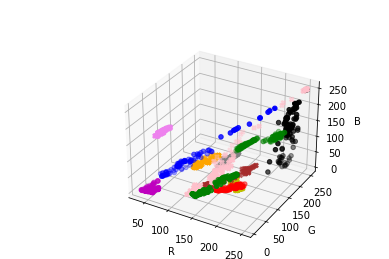

In [30]:
from mpl_toolkits.mplot3d import axes3d    

%matplotlib notebook
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')
ax1.scatter(x3, y3, z3, c ='b', marker='o')
ax1.scatter(x4, y4, z4, c ='k', marker='o')
ax1.scatter(x5, y5, z5, c ='m', marker='o')
ax1.scatter(x6, y6, z6, c ='violet', marker='X')
ax1.scatter(x7, y7, z7, c ='gray', marker='X')
ax1.scatter(x8, y8, z8, c ='y', marker='X')
ax1.scatter(x9, y9, z9, c ='brown', marker='X')
ax1.scatter(x10, y10, z10, c ='orange', marker='X')
ax1.scatter(x11, y11, z11, c ='pink', marker='X')

ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
# Mostramos el gráfico
plt.show()

# Inciso B

In [36]:
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os

In [37]:
#datos_pca = pd.DataFrame(p3,p2)
datos_pca = []
for r in range(1300):
    im = Image.open(join(ruta, archivos[r]))
    s = stat.Stat(im)
    datos_pca.append(s.median)

In [38]:
scaler = StandardScaler(with_mean=True,with_std=True)
estandar = scaler.fit_transform(datos_pca)

In [39]:
pca_f=PCA(3)
data_proj = pca_f.fit_transform(estandar)
#volvemos nuestros datos en un dataframe
tabla_1 = pd.DataFrame(data_proj)

In [47]:
nombres_pca = []
for i in range(1300):
    if (i < 300):
        nombres_pca.append('manzanas')
    elif(300<= i < 400):
        nombres_pca.append('albaricoche')
    elif(400<= i < 500):
        nombres_pca.append('aguacate')
    elif(500<= i < 600):
        nombres_pca.append('carambola')
    elif(600<= i < 700):
        nombres_pca.append('cereza')
    elif(700<= i < 800):
        nombres_pca.append('arandano')
    elif(800<= i < 900):
        nombres_pca.append('kiwi')
    elif(900<= i < 1000):
        nombres_pca.append('naranja')
    elif(1000<= i < 1100):
        nombres_pca.append('durazno')
    elif(1100<= i < 1200):
        nombres_pca.append('piña')
    elif(1200<= i < 1300):
        nombres_pca.append('fresa')

In [48]:
proy_1 = tabla_1.iloc[:,0:2]

In [49]:
tabla_1['Nombre'] = nombres_pca

In [50]:
proy_1['Nombre'] = nombres_pca

In [51]:
proy_1.columns = ['pc1','pc2','Tipo de futa']

### Realizamos PCA

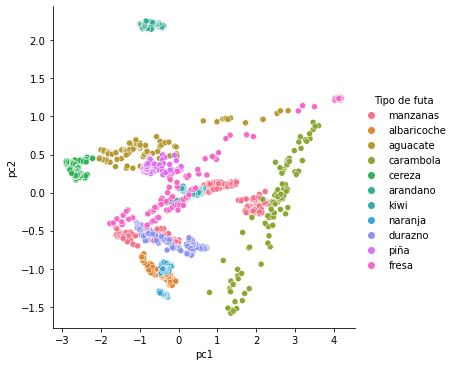

In [52]:
import seaborn as sns
sns.relplot(x='pc1', y='pc2', hue='Tipo de futa',data=proy_1)

### Realizamos el Kernel PCA

In [53]:
from sklearn.decomposition import KernelPCA
sigma = 10
ncomp = 1
# Kernel PCA con nuestros datos de entrenamiento
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/sigma)
# Proyecto nuestros datos de prueba (el grid) en el componente principal 'ncomp'
mesh_kpca = kpca.fit_transform(estandar)
# ajusto las proyeccions para un grid
#Z = np.reshape(mesh_kpca[:,ncomp],(-1,num))

In [54]:
tabla_2 = pd.DataFrame(mesh_kpca)

In [55]:
tabla_2['Nombre'] = nombres_pca

In [56]:
tabla_2.columns = ['kpc1','kpc2','Tipo de futa']

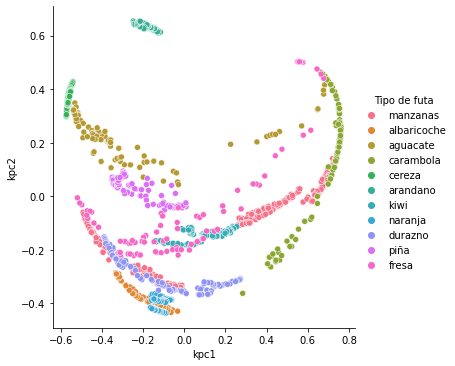

In [57]:
sns.relplot(x='kpc1', y='kpc2', hue='Tipo de futa',data=tabla_2)

# Inciso C

Debemos aplicar K-means y Kernel K-means

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
#y_km = kmeans.fit_predict(datos_pca)
y_km = kmeans.fit_predict(datos_pca)

In [59]:
data_toy_km = pd.DataFrame(datos_pca).assign(cl_km = y_km)

In [61]:
data_toy_km.mean()
data_toy_km.columns = ['x1','x2','x3','tipo']

In [62]:
colores = ('g','r','b','k','m','violet','gray','y','brown','orange','pink')
grupos = ('1','2','3','4','5','6','7','8','9','10','11')
d = data_toy_km.iloc[:,0:3]
x = data_toy_km.iloc[:,0:1]
y = data_toy_km.iloc[:,1:2]
z = data_toy_km.iloc[:,2:3]

In [117]:
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1,facecolor='y')
#ax = fig.gca(projection='3d')
#for d, colores, grupos in zip(d, colores, grupos):
 #   x, y, z = d
 #   ax.scatter(x,y,z,alpha = 0.8, c = colores, edgecolors = 'none', s=30, label=grupos)
#plt.title("Datos prros en 3D")
#plt.show()

### Graficamos 

In [63]:
t = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []
t7 = []
t8 = []
t9 = []
t10 = []
t11 = []
for r in range(1300):
    if(data_toy_km.iloc[r,3] == 1):
        t.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 2):
        t2.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 3):
        t3.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 4):
        t4.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 5):
        t5.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 6):
        t6.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 7):
        t7.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 8):
        t8.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 9):
        t9.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 10):
        t10.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 11):
        t11.append(data_toy_km.iloc[r,0:3])

In [64]:
#data_toy_km.iloc[0,0:3]

In [65]:
t = pd.DataFrame(t)
t2 = pd.DataFrame(t2)
t3 = pd.DataFrame(t3)
t4 = pd.DataFrame(t4)
t5 = pd.DataFrame(t5)
t6 = pd.DataFrame(t6)
t7 = pd.DataFrame(t7)
t8 = pd.DataFrame(t8)
t9 = pd.DataFrame(t9)
t10 = pd.DataFrame(t10)
t11 = pd.DataFrame(t11)

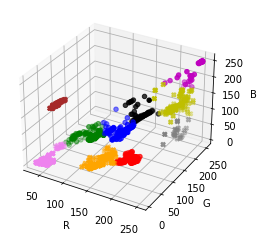

In [66]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(t.iloc[:,0:1], t.iloc[:,1:2], t.iloc[:,2:3], c='g', marker='o')
ax1.scatter(t2.iloc[:,0:1], t2.iloc[:,1:2], t2.iloc[:,2:3], c ='r', marker='o')
ax1.scatter(t3.iloc[:,0:1], t3.iloc[:,1:2], t3.iloc[:,2:3], c ='b', marker='o')
ax1.scatter(t4.iloc[:,0:1], t4.iloc[:,1:2], t4.iloc[:,2:3], c ='k', marker='o')
ax1.scatter(t5.iloc[:,0:1], t5.iloc[:,1:2], t5.iloc[:,2:3], c ='m', marker='o')
ax1.scatter(t6.iloc[:,0:1], t6.iloc[:,1:2], t6.iloc[:,2:3], c ='violet', marker='X')
ax1.scatter(t7.iloc[:,0:1], t7.iloc[:,1:2], t7.iloc[:,2:3], c ='gray', marker='X')
ax1.scatter(t8.iloc[:,0:1], t8.iloc[:,1:2], t8.iloc[:,2:3], c ='y', marker='X')
ax1.scatter(t9.iloc[:,0:1], t9.iloc[:,1:2], t9.iloc[:,2:3], c ='brown', marker='X')
ax1.scatter(t10.iloc[:,0:1], t10.iloc[:,1:2], t10.iloc[:,2:3], c ='orange', marker='X')
ax1.scatter(t11.iloc[:,0:1], t11.iloc[:,1:2], t11.iloc[:,2:3], c ='pink', marker='X')
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
# Mostramos el gráfico
plt.show()

### Ahora ocupamos el Kernel k-means

In [67]:
ejercico3d = pd.DataFrame(datos_pca)

En esta sección se ocupo como apoyo el lenguaje de programación para poder encontrar el kernek-kmeans, se anexa a continuación


    library("imager") # manipular imagenes
    library("plyr") # visualización 
    library("raster") # manipular imagenes
    library("gridExtra") # visualizar imagenes
    library("grid") # visualizar imagnes
    library("rgl") # manipular imagenes
    library("ggplot2") # visualizar imagenes
    library("plot3D") # visualizar 3d imagenes
    library("plot3Drgl") # visualizar 3d imagenes
    library("kernlab") # Kernel PCA y Kernel K-means
    library("tidyverse")
    ###########Lo realizamos con datos HSV
    datos3 <- read.csv("C:/Users/Marcelo Sanchez/Downloads/datos_ult.csv")
    #View(datos3)
    datos3[,2]
    datos3[,3]
    datos3[,4]

    df = data.frame(
      datos3[,2],
      datos3[,3],
      datos3[,4]
    )
    df <- df %>% as.matrix
    set.seed(0)
    K <- kkmeans(df, 11, kernel = "rbfdot",
             kpar = list(sigma=20),
             alg ="kkmeans") 
    df <- df %>% as.data.frame

    df$label <- K@.Data
    Tabla5 <- K@.Data %>% table
    View(Tabla5)


    write.csv(df, file="C:/Users/Marcelo Sanchez/Downloads/Tabla5d.csv")

In [68]:
ejercico3d.to_csv('datos3.csv')

In [69]:
Tabla5 = pd.read_csv('Tabla5.csv')
Tabla5 = Tabla5.iloc[:,1:]
Tabla5

,datos3...2.,datos3...3.,datos3...4.,label
0,142,32,25,4
1,142,32,26,6
2,141,32,25,7
3,140,30,24,5
4,139,30,24,11
...,...,...,...,...
1295,131,37,29,7
1296,131,37,29,7
1297,131,36,28,1
1298,129,36,29,11


In [70]:
############## Volvemos a separar nuestros datos para intentar graficar
##############OJO AQUI PENDEJO NO CORRAS ASI PORQUE SI 
data_toy_km = Tabla5
t = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []
t7 = []
t8 = []
t9 = []
t10 = []
t11 = []
for r in range(1300):
    if(data_toy_km.iloc[r,3] == 1):
        t.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 2):
        t2.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 3):
        t3.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 4):
        t4.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 5):
        t5.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 6):
        t6.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 7):
        t7.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 8):
        t8.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 9):
        t9.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 10):
        t10.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 11):
        t11.append(data_toy_km.iloc[r,0:3])

In [71]:
t = pd.DataFrame(t)
t2 = pd.DataFrame(t2)
t3 = pd.DataFrame(t3)
t4 = pd.DataFrame(t4)
t5 = pd.DataFrame(t5)
t6 = pd.DataFrame(t6)
t7 = pd.DataFrame(t7)
t8 = pd.DataFrame(t8)
t9 = pd.DataFrame(t9)
t10 = pd.DataFrame(t10)
t11 = pd.DataFrame(t11)

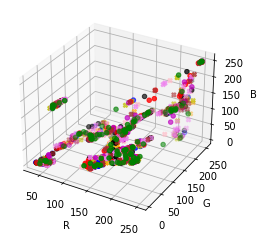

In [72]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(t.iloc[:,0:1], t.iloc[:,1:2], t.iloc[:,2:3], c='g', marker='o')
ax1.scatter(t2.iloc[:,0:1], t2.iloc[:,1:2], t2.iloc[:,2:3], c ='r', marker='o')
ax1.scatter(t3.iloc[:,0:1], t3.iloc[:,1:2], t3.iloc[:,2:3], c ='b', marker='o')
ax1.scatter(t4.iloc[:,0:1], t4.iloc[:,1:2], t4.iloc[:,2:3], c ='k', marker='o')
ax1.scatter(t5.iloc[:,0:1], t5.iloc[:,1:2], t5.iloc[:,2:3], c ='m', marker='o')
ax1.scatter(t6.iloc[:,0:1], t6.iloc[:,1:2], t6.iloc[:,2:3], c ='violet', marker='X')
ax1.scatter(t7.iloc[:,0:1], t7.iloc[:,1:2], t7.iloc[:,2:3], c ='gray', marker='X')
ax1.scatter(t8.iloc[:,0:1], t8.iloc[:,1:2], t8.iloc[:,2:3], c ='y', marker='X')
ax1.scatter(t9.iloc[:,0:1], t9.iloc[:,1:2], t9.iloc[:,2:3], c ='brown', marker='X')
ax1.scatter(t10.iloc[:,0:1], t10.iloc[:,1:2], t10.iloc[:,2:3], c ='orange', marker='X')
ax1.scatter(t11.iloc[:,0:1], t11.iloc[:,1:2], t11.iloc[:,2:3], c ='pink', marker='X')
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
# Mostramos el gráfico
plt.show()

# Inciso D

Ahora volvemos a ocupar nuestros datos pero los modificamos a un nuevo espacio HSV, debemos realizar una conversión de dichos valores.

In [ ]:
#im_hsv = color.rgb2hsv(im)
#im_hsv.shape